<a href="https://colab.research.google.com/github/Razzf/MachineLearningTests/blob/master/TFimageCls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from tensorflow.keras import layers


In [32]:
data = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = data.load_data()

train_images = train_images[:, :, :, np.newaxis]
test_images = test_images[:, :, :, np.newaxis]
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#for label in test_labels:
#  print(class_names[label])

In [33]:
rand_value = randint(0, 10000)


train_images = train_images/255.0
test_images = test_images/255.0



In [38]:
# model =  keras.models.Sequential([
#   layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
#   layers.MaxPooling2D((2, 2)),
#   layers.Conv2D(64, (3, 3), activation='relu'),
#   layers.MaxPooling2D((2, 2)),
#   layers.Conv2D(64, (3, 3), activation='relu'),
#   layers.Flatten(),
#   layers.Dense(64, activation='relu'),
#   layers.Dense(10, activation='softmax')
# ])
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=(28,28)),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics='accuracy')

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.fit(train_images, train_labels, epochs= 15)

test_loss, test_accu = model.evaluate(test_images, test_labels)

print("Accuracy: ", test_accu)


Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4847 - accuracy: 0.8236
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3661 - accuracy: 0.8652
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3303 - accuracy: 0.8769
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3070 - accuracy: 0.8848
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2933 - accuracy: 0.8903
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2777 - accuracy: 0.8961
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2647 - accuracy: 0.9009
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2543 - accuracy: 0.9057
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2461 - accuracy: 0.9074
Epoch 10/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.236

(10000, 28, 28)
1


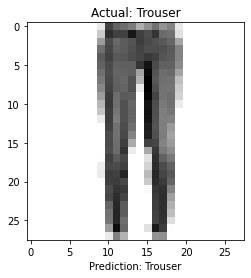

In [41]:
prediction = model.predict(test_images)

rand_value = randint(0, 9999)

test_images = np.array(test_images).reshape(-1, 28, 28)
print(test_images.shape)
plt.grid(False)
plt.imshow(test_images[rand_value], cmap=plt.cm.binary)
plt.title("Actual: " + class_names[test_labels[rand_value]])
index = np.argmax(prediction[rand_value])
print(index)
plt.xlabel('Prediction: ' + class_names[index])
plt.show()
